In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
from scipy.optimize import minimize
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# SIGMOIDPULSE0_002 t_mid = 13000 duration = 10 s

In [2]:
parseg = 500
neglect_t = 3000
t_mid = 13000
t_mid2 = t_mid + 10000
sigm_par = 0.002

In [3]:
t_mid_poiss = str(t_mid)
sigm_par_poiss = "{:.5f}".format(sigm_par)
function = "sigmoidpulse" + str(format(sigm_par, 'f')).replace('.', '_')
while function.endswith('0'):
    function = function[:-1]
Dd = "0.950"
subnets = "STN"
simulations = [str(i) for i in range(32)]

new_Dd = Dd.replace('.','_')


In [4]:
Dd_values = [round(0.85 + i * 0.005, 3) for i in range(21)] #max 21

# FLAT. media per ogni valore di dd

In [5]:
function1 = "flat"
d = ["{:.3f}".format(elemento) for elemento in Dd_values]

pow_t_mean_all = []
for simulation in simulations:

    pow_t_mean = []
    t = []
    f = []
    print(simulation)

    for ddd in d:
        print(ddd)
        periodogram_path = './periodograms/' + ddd.replace('.','_') + '_' + subnets + '_' + function1 + '_' + simulation
        if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
            os.makedirs(periodogram_path)

        data = np.loadtxt("./build/output/n1/" + function1 + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T
        data[0] = data[0]/1000
        data[1] = data[1]/1.083

        s = utils.SpikeSim("./build/output/n1/" + function1 + "_0.00_0.0000_0.00_" + ddd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
        output=s.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img='')

        f = output[0]
        t = output[1]
        Sxx = output[2]

        mask = (8 <= f) & (f <= 26)
        Sxx_lim = Sxx[mask,:]
        f_lim = f[mask]

        pow_t_mean.append(np.mean(Sxx_lim))

    ###################################################################################################################

    pow_t_mean_all.append(pow_t_mean)
print(pow_t_mean_all)

np.savetxt('./build/output/n1/pow_t_mean'+str(parseg)+'.txt', pow_t_mean_all, header='pow_t_mean', delimiter='\t')

0
0.850
nparseg = 1000	noverlap=500
0.855
nparseg = 1000	noverlap=500
0.860
nparseg = 1000	noverlap=500
0.865
nparseg = 1000	noverlap=500
0.870
nparseg = 1000	noverlap=500
0.875
nparseg = 1000	noverlap=500
0.880
nparseg = 1000	noverlap=500
0.885
nparseg = 1000	noverlap=500
0.890
nparseg = 1000	noverlap=500
0.895
nparseg = 1000	noverlap=500
0.900
nparseg = 1000	noverlap=500
0.905
nparseg = 1000	noverlap=500
0.910
nparseg = 1000	noverlap=500
0.915
nparseg = 1000	noverlap=500
0.920
nparseg = 1000	noverlap=500
0.925
nparseg = 1000	noverlap=500
0.930
nparseg = 1000	noverlap=500
0.935
nparseg = 1000	noverlap=500
0.940
nparseg = 1000	noverlap=500
0.945
nparseg = 1000	noverlap=500
0.950
nparseg = 1000	noverlap=500
1
0.850
nparseg = 1000	noverlap=500
0.855
nparseg = 1000	noverlap=500
0.860
nparseg = 1000	noverlap=500
0.865
nparseg = 1000	noverlap=500
0.870
nparseg = 1000	noverlap=500
0.875
nparseg = 1000	noverlap=500
0.880
nparseg = 1000	noverlap=500
0.885
nparseg = 1000	noverlap=500
0.890
npar

TypeError: can only concatenate str (not "int") to str

In [6]:
np.savetxt('./build/output/n1/pow_t_mean'+str(parseg)+'.txt', pow_t_mean_all, header='pow_t_mean', delimiter='\t')

## funzione dell'intensità della sigmoide attesa

In [7]:
Dd_values = Dd_values[::-1] + Dd_values
pow_t_mean_all = np.loadtxt('./build/output/n1/pow_t_mean'+str(parseg)+'.txt', delimiter='\t', skiprows=1)
pow_t_mean_point_int= pow_t_mean_all.tolist()
for i in range(32):
    pow_t_mean_point_int[i] = pow_t_mean_point_int[i][::-1] + pow_t_mean_point_int[i]

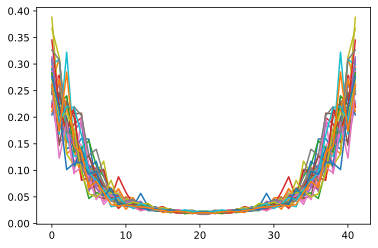

In [8]:
for i in range(32):
    plt.plot(pow_t_mean_point_int[i])
plt.show()

In [9]:
intermediate_points = [round((Dd_values[i] + Dd_values[i + 1]) / 2, 4) for i in range(len(Dd_values) - 1)]


In [10]:
# Inizializza variabile di controllo per il secondo loop
start_second_loop = False

t_d_int = []
t_d_int.append(33000)
# Primo loop
for x in intermediate_points[:]:
    # Controlla se è il momento di iniziare il secondo loop
    if x == 0.85:
        start_second_loop = True
        t_d_int.append((t_mid2 + t_mid)/2)
        continue

    # Calcola i valori in base alla variabile di controllo
    if not start_second_loop:
        y = -np.log((0.1) / (x - 0.85) - 1) / sigm_par + t_mid2
    else:
        y = -np.log((-0.1) / (x - 0.95) - 1) / sigm_par + t_mid

    # Aggiungi il valore calcolato a t_d_int
    t_d_int.append(y)

t_d_int.append(0)

t_d_int = np.array(t_d_int)
t_d_int = np.round(t_d_int).astype(int)


In [11]:
for i in range(32):
    pow_t_mean_point_int[i].insert(0, 0)
pow_t_mean_point_int = np.array(pow_t_mean_point_int)

In [12]:
%matplotlib widget
def genera_coppie_tempo_intensita(tempo_array, intensita_array):
    x = []
    y = []
    
    for tempo in range(tempo_array[-1]):
        x.append(tempo)
        if np.isin(tempo, tempo_array):
            indices = np.where(tempo_array == tempo)[0]
            y.append(intensita_array[:][indices[0]])
        else:
            y.append(y[-1])  # Ripeti l'ultimo valore di intensita_array se tempo non è presente
    
    return np.array(x), np.array(y)

power = []
time = []
for i in range(32):
    time_i, power_i = genera_coppie_tempo_intensita(t_d_int[::-1], pow_t_mean_point_int[i][::-1])
    power.append(power_i)
    time.append(time_i)

    # Plot dei dati
    plt.plot(time_i, power_i, marker='o')
    plt.xlabel('Tempo')
    plt.ylabel('Intensità')
    plt.title('Andamento Tempo-Intensità')
    plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
df = []

for i in range(32):
    # Crea un DataFrame con i dati
    df_i = pd.DataFrame({'Tempo': time[i], 'Valore': power[i]})

    # Calcola la media mobile e assegna i risultati al tempo centrale
    window_size = parseg
    df_i['Media_Mobile'] = df_i['Valore'].rolling(window=window_size, center=True).mean()

    # Rimuovi le righe con valori mancanti (prime e ultime finestre)
    df_i = df_i.dropna()

    # Rimuovi i primi neglect_t elementi
    df_i = df_i.iloc[neglect_t:]

    # Aggiungi il DataFrame alla lista
    df.append(df_i)

# Stampa il DataFrame risultante
#print(df)

In [14]:
for i in range(2):
    # Crea un oggetto di figura e un singolo assi
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot della media mobile
    ax1.plot(df[i]['Tempo'].values, df[i]['Media_Mobile'].values, label='Media Mobile', color='blue')

    # Etichette e legenda per l'asse x e y
    ax1.set_xlabel('Tempo')
    ax1.set_ylabel('Media Mobile', color='blue')
    ax1.tick_params('y', colors='blue')

    plt.title(f'Media mobile con finestra lunga parseg = {parseg}')
    # Mostra il plot
    plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [15]:
# Crea un oggetto di figura e un singolo asse
fig, ax1 = plt.subplots(figsize=(10, 6))

# Loop attraverso i dati e plotta le medie mobili
for i in range(32):
    ax1.plot(df[i]['Tempo'].values, df[i]['Media_Mobile'].values, label=f'Media Mobile {i}', alpha=0.7)

# Etichette e legenda per l'asse x e y
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Media Mobile')
ax1.tick_params('y')

# Aggiungi una legenda
ax1.legend()

# Titolo del plot
plt.title(f'Medie mobili sovrapposte con finestra lunga parseg = {parseg}')

# Mostra il plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
media = []
error = []
tt = []

for i in range(0, len(df[0]['Tempo']), int(parseg - parseg*0.5)): # qui metti 0. overlap
    media.append(np.mean([df_i['Media_Mobile'].iloc[i] for df_i in df]))
    error.append(np.std([df_i['Media_Mobile'].iloc[i] for df_i in df]))
    tt.append(i + int(parseg*0.5))


In [17]:
%matplotlib widget
plt.errorbar(tt, media, yerr=error, fmt='o', label='Media Mobile con errore')
plt.xlabel('Tempo')
plt.ylabel('Media Mobile')
plt.title('intensità attesa')
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
print(media)
print(error)
print(tt)

[0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.2589238890428149, 0.22623104657912974, 0.1723959289833446, 0.09930256888504298, 0.047200291690002505, 0.02772763359561716, 0.02264465469182166, 0.021230459626780565, 0.020596018702714186, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020294827095647044, 0.020596018702714186, 0.021230459626780565, 0.02264465469182166, 0.02772763359561716, 0.047200291690002505, 0.09930256888504296, 0.17239592898334463, 0.22623104657912974, 0.2589238890428149, 0.2742433217526078, 0.2742433217526078, 0.2742433217526078, 0.27424332175260

In [ ]:
# sigmoidpulse with parseg 250 overlap 0.5
media=[0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.25478326447149535, 0.23202214792938336, 0.2241923238388968, 0.2241923238388968, 0.22331103129451843, 0.20495076995330258, 0.18747180115646506, 0.17311545211309298, 0.15294474804803557, 0.1396942555588354, 0.11358867983641772, 0.09036846840843518, 0.0763873083501817, 0.05841254289936259, 0.04669320750980432, 0.04007066064047369, 0.03473234292991717, 0.03080359110540759, 0.027482964623595167, 0.025615423537146274, 0.024229660115548328, 0.023003266928255182, 0.02238682837743957, 0.02188933490849725, 0.02158271146066814, 0.021158056256268428, 0.020711989865092255, 0.0206905786783158, 0.0206905786783158, 0.020557049655330978, 0.020168883890840192, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.019914247149334242, 0.020168883890840192, 0.02055704965533097, 0.0206905786783158, 0.0206905786783158, 0.02071198986509226, 0.021158056256268428, 0.02158271146066814, 0.02188933490849725, 0.02238682837743957, 0.023003266928255182, 0.02422966011554833, 0.025615423537146274, 0.027482964623595167, 0.030803591105407594, 0.03473234292991717, 0.040070660640473696, 0.04669320750980432, 0.05841254289936259, 0.0763873083501817, 0.09036846840843518, 0.11358867983641772, 0.1396942555588354, 0.15294474804803557, 0.17311545211309298, 0.18747180115646506, 0.20495076995330258, 0.22331103129451846, 0.2241923238388968, 0.2241923238388968, 0.23202214792938336, 0.2547832644714954, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209, 0.2697145569231209]
error=[0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.033210257112849736, 0.04055674548957555, 0.047709152771263454, 0.047709152771263454, 0.04612987536398969, 0.024178762812190977, 0.04305030929585567, 0.031174847838532478, 0.028665537221341984, 0.02651025038182155, 0.022722470807291766, 0.018170840311126663, 0.014816534517933, 0.008630304906228299, 0.006312647967871339, 0.004572112867194109, 0.0029358573959980265, 0.0027804743586662024, 0.001589194113254279, 0.0014911691697869062, 0.001535903105637992, 0.001352898756551427, 0.0012615103284442405, 0.0011945938871576116, 0.0016271621877926557, 0.0012366707572263659, 0.0014419139547413636, 0.001466268829650556, 0.001466268829650556, 0.0012104167505053848, 0.001022140487598335, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0014277300173266203, 0.0010221404875983353, 0.0012104167505053848, 0.001466268829650556, 0.001466268829650556, 0.0014419139547413636, 0.0012366707572263656, 0.0016271621877926557, 0.0011945938871576118, 0.001261510328444241, 0.001352898756551427, 0.001535903105637992, 0.0014911691697869066, 0.0015891941132542785, 0.002780474358666203, 0.0029358573959980257, 0.004572112867194109, 0.006312647967871339, 0.0086303049062283, 0.014816534517933, 0.018170840311126667, 0.02272247080729176, 0.026510250381821553, 0.028665537221341984, 0.031174847838532478, 0.04305030929585567, 0.024178762812190974, 0.0461298753639897, 0.047709152771263454, 0.047709152771263454, 0.04055674548957555, 0.03321025711284974, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065, 0.042341002234504065]
tt=[125, 250, 375, 500, 625, 750, 875, 1000, 1125, 1250, 1375, 1500, 1625, 1750, 1875, 2000, 2125, 2250, 2375, 2500, 2625, 2750, 2875, 3000, 3125, 3250, 3375, 3500, 3625, 3750, 3875, 4000, 4125, 4250, 4375, 4500, 4625, 4750, 4875, 5000, 5125, 5250, 5375, 5500, 5625, 5750, 5875, 6000, 6125, 6250, 6375, 6500, 6625, 6750, 6875, 7000, 7125, 7250, 7375, 7500, 7625, 7750, 7875, 8000, 8125, 8250, 8375, 8500, 8625, 8750, 8875, 9000, 9125, 9250, 9375, 9500, 9625, 9750, 9875, 10000, 10125, 10250, 10375, 10500, 10625, 10750, 10875, 11000, 11125, 11250, 11375, 11500, 11625, 11750, 11875, 12000, 12125, 12250, 12375, 12500, 12625, 12750, 12875, 13000, 13125, 13250, 13375, 13500, 13625, 13750, 13875, 14000, 14125, 14250, 14375, 14500, 14625, 14750, 14875, 15000, 15125, 15250, 15375, 15500, 15625, 15750, 15875, 16000, 16125, 16250, 16375, 16500, 16625, 16750, 16875, 17000, 17125, 17250, 17375, 17500, 17625, 17750, 17875, 18000, 18125, 18250, 18375, 18500, 18625, 18750, 18875, 19000, 19125, 19250, 19375, 19500, 19625, 19750, 19875, 20000, 20125, 20250, 20375, 20500, 20625, 20750, 20875, 21000, 21125, 21250, 21375, 21500, 21625, 21750, 21875, 22000, 22125, 22250, 22375, 22500, 22625, 22750, 22875, 23000, 23125, 23250, 23375, 23500, 23625, 23750, 23875, 24000, 24125, 24250, 24375, 24500, 24625, 24750, 24875, 25000, 25125, 25250, 25375, 25500, 25625, 25750, 25875, 26000, 26125, 26250, 26375, 26500, 26625, 26750, 26875, 27000, 27125, 27250, 27375, 27500, 27625, 27750, 27875, 28000, 28125, 28250, 28375, 28500, 28625, 28750, 28875, 29000, 29125, 29250, 29375, 29500, 29625, 29750, 29875]


In [ ]:
# sigmoidpulse with parseg 500 overlap 0.8
media=

error=

tt=



# simulazione SIGMOIDPULSE

In [19]:
# Inizializza variabile di controllo per il secondo loop
start_second_loop = False

t_d = []
t_d.append(t_mid*2)
# Primo loop
for x in Dd_values[1:-1]:
    # Controlla se è il momento di iniziare il secondo loop
    if x == 0.85:
        start_second_loop = True
        t_d.append((t_mid2 + t_mid)/2)
        continue

    # Calcola i valori in base alla variabile di controllo
    if not start_second_loop:
        y = -np.log((0.1) / (x - 0.85) - 1) / sigm_par + t_mid2
    else:
        y = -np.log((-0.1) / (x - 0.95) - 1) / sigm_par + t_mid

    # Aggiungi il valore calcolato a t_d_int
    t_d.append(y)

t_d.append(t_mid/10 + neglect_t*2.5)

t_d = np.array(t_d)
t_d = np.round(t_d).astype(int)

In [20]:
%matplotlib inline
#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_" + t_mid_poiss + ".00_" + sigm_par_poiss + "_0.00_" + Dd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T

data[0] = data[0]/1000
data[1] = data[1]/1.083

#check if periodogram folder exists and if not create one
#spikesim
periodogram_paths = []
s = []
for simulation in simulations:
    periodogram_path = './periodograms/' + Dd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
    if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
        os.makedirs(periodogram_path) 
    periodogram_paths.append(periodogram_path)
    ss = utils.SpikeSim("./build/output/n1/" + function + "_" + t_mid_poiss + ".00_" + sigm_par_poiss + "_0.00_" + Dd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
    s.append(ss)

all_pow_t = []
t = []
f = []

for index,ss in enumerate(s):
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]

    pow_t = []
    for i in range (len(t)):
        pow_t.append(np.mean(Sxx_lim[:,i]))

    all_pow_t.append(pow_t)

np.vstack(all_pow_t)
pow_t_mean = np.mean(all_pow_t, axis=0)
pow_error = np.std(all_pow_t, axis=0)

nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500
nparseg = 1000	noverlap=500


In [24]:
print(pow_t_mean.tolist())
print(pow_error.tolist())
print(t.tolist())


[0.2562026737051695, 0.260376914780447, 0.24631148573755757, 0.24671281003990608, 0.2660861304510055, 0.2639429116561076, 0.2662100536846288, 0.26227044558746965, 0.2613405657501557, 0.25673649777735397, 0.2540716532079238, 0.24635204595882051, 0.25289144309616757, 0.2616456294926924, 0.25003126153268557, 0.24428528438603375, 0.24000036263597885, 0.20064815109120646, 0.132840739281901, 0.07009502649484306, 0.03605740319519382, 0.02668501323297473, 0.022724364398919176, 0.02089348063421892, 0.020135820746303715, 0.02029384858103063, 0.020560557012745756, 0.021748322601691288, 0.020977789520144282, 0.020508027062315397, 0.021148216746145965, 0.021676180922910925, 0.021004543267645222, 0.02117555648061934, 0.021081577766958695, 0.020753987441627736, 0.020800118426131144, 0.020555289837868182, 0.02118479581871424, 0.03133330583720935, 0.06545610520783554, 0.13133607876085693, 0.21604237570812204, 0.2620967115181816, 0.26044773440383145, 0.25436331842520665, 0.26874427365301723, 0.282922780

In [ ]:
# parseg 250 overlap0.5
pow_t_mean = np.array([0.2515572241191702, 0.24774108405125045, 0.255016543155679, 0.26000100180388996, 0.2504861463405993, 0.25467559687454966, 0.25422167567678206, 0.260181526073083, 0.2664488052011643, 0.258275836093391, 0.24946963563114344, 0.23775868158008148, 0.22107881546783822, 0.22816345337119037, 0.2363951200394672, 0.24320997970807562, 0.25041628962743434, 0.2592377105527339, 0.25819229617286155, 0.25367802643801574, 0.2653058747644922, 0.2721763535566623, 0.26659136763157654, 0.2522138944730871, 0.2520468272798265, 0.25290294294465226, 0.25845402669601997, 0.26390267033555287, 0.26147722356057057, 0.27036986776620536, 0.25910177466090567, 0.23752690559538947, 0.2502785140224342, 0.25863929653489126, 0.258087031696601, 0.2545830862190812, 0.2559290260773507, 0.2549306248397338, 0.25410565711011723, 0.24801133865824096, 0.2647442738397409, 0.2466630734601395, 0.23955629455147504, 0.2485758133130727, 0.24311460150212297, 0.25142004209887736, 0.2518833123124007, 0.23156541109047257, 0.23994166876194598, 0.2404606027859915, 0.23397233584310118, 0.2461531549056791, 0.24130481004045182, 0.25653028306261605, 0.2671134272163617, 0.26300072249106204, 0.27519793280955357, 0.2649807602634257, 0.24048409824248004, 0.2482542200977661, 0.23522297880073995, 0.22312367467899683, 0.23987890179138088, 0.24739138842103964, 0.23650615115891277, 0.24154734809268943, 0.2458445848741137, 0.22987153319339165, 0.2290981820382959, 0.23665974673126494, 0.226483625147182, 0.2026634374772816, 0.19446922235672826, 0.1588256687725995, 0.13765803438856505, 0.1264229345059854, 0.12088905629681182, 0.1033539757013679, 0.0741262535743312, 0.0593386929750279, 0.04855358914255242, 0.03971582922609549, 0.03414242332102415, 0.03580067477957399, 0.03585330168199302, 0.03024193075689067, 0.02453441557480717, 0.024486536792393383, 0.023871291157540872, 0.02193293369399694, 0.022872850468020255, 0.019790473204190938, 0.01830067101204269, 0.02520387066755028, 0.024052554597423684, 0.01917239217753004, 0.021348998547013765, 0.019918496557810035, 0.017892345234531773, 0.019341335749953774, 0.01945778661541844, 0.022126382110722587, 0.018822496440839984, 0.019011406664657268, 0.01743400581687988, 0.018796435040296336, 0.02262130084648821, 0.02171965679848567, 0.021075661658310468, 0.02071995792858322, 0.020513620783139806, 0.02342943482446085, 0.022562158878655876, 0.021595754360043823, 0.02053436989629505, 0.019343532854178922, 0.021096084856931867, 0.02216988711504333, 0.019990849677374047, 0.01993157429327065, 0.019722300770507455, 0.01996507630084139, 0.02066049397715389, 0.022831110931994362, 0.0204147799543333, 0.020541227640952033, 0.020397722092621428, 0.021463119136719395, 0.02165098208064698, 0.02270961370814815, 0.021629049926051653, 0.020071259364727548, 0.016243565213361493, 0.017820832567536752, 0.023325845729970027, 0.02159714570998989, 0.022192610077415745, 0.023007661271728146, 0.019203149769974132, 0.018227982860453303, 0.020428105971155287, 0.020887881368729808, 0.020782542622557253, 0.020296889999282114, 0.01810926255469981, 0.01951959205737979, 0.0220328759625447, 0.02291879613142112, 0.020067378141907073, 0.017075705830466983, 0.020061421412375515, 0.018844548836216262, 0.020299391908643525, 0.021198468947613323, 0.02058786191138516, 0.020772533305262766, 0.018638940291222098, 0.020639773891798552, 0.023013023097347457, 0.02978729696216381, 0.03498551139448781, 0.039707743955808075, 0.05263582943955188, 0.06453181401763633, 0.06675643054018264, 0.08233633645106225, 0.11168970518055876, 0.1381923794665237, 0.15701407026232028, 0.16952701653224136, 0.18448082606198118, 0.22461982234112632, 0.24520459990478793, 0.24780866557639242, 0.26344047308848784, 0.26353674097967844, 0.26278889321688265, 0.2677673534925572, 0.25793919597746146, 0.25278903420526416, 0.24816396356520237, 0.25176936920655374, 0.24971053430088452, 0.26382617354809307, 0.25257065937039774, 0.24056372586353936, 0.23733234889340782, 0.2630711314418682, 0.283931004628843, 0.27845171893325693, 0.2857133026311539, 0.2739614677549587, 0.26690401696329247, 0.2809277782954031, 0.2780380832043403, 0.2630143922401318, 0.2561653350978457, 0.24837329509001557, 0.25817800302540056, 0.28158256656233854, 0.2915274342752092, 0.27492943956412885, 0.2796958298397253, 0.30652773396568134, 0.29744421236002627, 0.27352098860097296, 0.27603011952854495, 0.26672663091865845, 0.26146628966109825, 0.2617649518128896, 0.26300888569140135, 0.2743045319716297, 0.2720401079293384, 0.2729126091383753, 0.27691729819836913, 0.27139934420258355, 0.2622147015716619, 0.2579483723299596, 0.25973863848018375, 0.2614304497318355, 0.26701914786444586, 0.26727017719574564, 0.28084234518750895, 0.27405570607465846, 0.2515579249560586, 0.2572764102303952, 0.26334570817412983, 0.2724525429893858, 0.28657880844995043, 0.28245234510900846, 0.29611415820424075, 0.30279646708785957, 0.2933788033954918, 0.2797647042934896, 0.2679764314991701, 0.26066319607556493, 0.2740217642979182, 0.2818209783713884, 0.26864634253448827])
pow_error = np.array([0.0822041621907141, 0.08012335290873517, 0.08076790703989806, 0.09100879629665269, 0.10469089575028821, 0.10682340048450945, 0.1124971114069009, 0.10584558235568137, 0.11065596676374108, 0.10506825943013187, 0.0953327660152162, 0.08990086943047418, 0.07990822175970379, 0.07004933704547817, 0.06683422693126886, 0.06508317188431241, 0.0821535913127396, 0.0870027026599094, 0.10189555836870277, 0.08388427142215231, 0.08478503551258769, 0.08879697982834446, 0.09087713261122854, 0.07922971668835335, 0.07520820957630342, 0.060166581814222346, 0.06941663730707166, 0.07694579612817654, 0.08075535331499252, 0.08603589117647681, 0.10722079951364885, 0.09768386615231746, 0.08716349965046007, 0.08168308866863803, 0.08657165298132678, 0.08186365954194408, 0.07116027498153552, 0.08043877533785769, 0.0858860040945718, 0.08754891799089944, 0.10742743398918092, 0.0782997624200099, 0.06909690836381754, 0.07621209464011157, 0.09067072467102691, 0.07507157260406443, 0.08657828719081738, 0.06847893998294216, 0.08479618306995342, 0.08772655591156191, 0.08333117409971025, 0.09780813324659238, 0.07893702999018765, 0.08087788838292571, 0.08108710749681017, 0.08564708818481205, 0.09210725781403883, 0.09984080021796006, 0.09397635807829695, 0.10143765368585876, 0.07482720200368258, 0.08567886222332341, 0.09273035525553243, 0.09589053953942478, 0.08909383356320295, 0.0855434328231845, 0.09048807373598855, 0.0816348707833891, 0.07578730596272262, 0.07443923800554172, 0.08597965925367385, 0.07971203368682626, 0.0695178548422162, 0.05636117089981107, 0.06594183482828907, 0.07343739541130595, 0.07992675948462803, 0.06732663569509871, 0.03971345163706981, 0.036180913806392295, 0.0273194100765556, 0.02225991477197629, 0.02455440675294273, 0.025026122135309976, 0.023336791964885296, 0.019808205495214448, 0.014290986585027777, 0.010354278133883286, 0.012413491114625193, 0.012793418212670367, 0.011963615203496869, 0.011383651660908293, 0.008973916421747156, 0.014729304823772634, 0.014290625369614483, 0.01201289025194037, 0.010657640858488242, 0.010976804989837151, 0.008539286580947101, 0.008982700635565385, 0.008990277705342588, 0.0127381093413989, 0.01120418459978543, 0.011181946551459132, 0.010062757172693514, 0.0068617180162556714, 0.012299233972816183, 0.014509252175974516, 0.010292628106568289, 0.011419024398057413, 0.014646445110399173, 0.012676325794027693, 0.011890921555656958, 0.011282187604640698, 0.012287979807601159, 0.009856220742879057, 0.011072480708410777, 0.010530748601278606, 0.008535442916619654, 0.011060111085875226, 0.011040296207689084, 0.007864573184410072, 0.010050768069796694, 0.014183141132765554, 0.01140201795512416, 0.012532070377461471, 0.009303016845048783, 0.009680139721346024, 0.00991378618358884, 0.015837503202549175, 0.011812860468007827, 0.009498426102941765, 0.00924443559041148, 0.007784633476537687, 0.015559211893007777, 0.010764239115114111, 0.011711749319898896, 0.015495564990300383, 0.012500478744958009, 0.011590524065842458, 0.008674946479933408, 0.0094556392756834, 0.01321187796120168, 0.01099360205692259, 0.008463064933638907, 0.008986788103926018, 0.011183321390729431, 0.014401185975220023, 0.01243010774735966, 0.008747702767541339, 0.011487014822269938, 0.008796519839553266, 0.009438840693514312, 0.014834280478184173, 0.01196225987122629, 0.0143199334125322, 0.009086849330660146, 0.009643457351296604, 0.013743337600319785, 0.023784899496453217, 0.02842849748361082, 0.024536900593785823, 0.02608816276994788, 0.04088747899627281, 0.04361210513374768, 0.05025578962056493, 0.06612627350650774, 0.07357984168739445, 0.08963568339609382, 0.09522208925135106, 0.09765430983497869, 0.10010186905824182, 0.09415280345195749, 0.09045426661675125, 0.08824421072438153, 0.08728628680391454, 0.09679396652469338, 0.08730581857107755, 0.09044222521647975, 0.10805980465745182, 0.10999268313234288, 0.11340152153837027, 0.10955394398588966, 0.09715584036431099, 0.09710065939149619, 0.09038499776307743, 0.08297994205567387, 0.0931061261361824, 0.09630960304849671, 0.09842184980850446, 0.09756698312758971, 0.08536652252846982, 0.08958205820306313, 0.0957716618114933, 0.09722275337139741, 0.09090950941120671, 0.0801762193813315, 0.08053420309433823, 0.0831758728303847, 0.07742877348737678, 0.08223465290875699, 0.077721592299748, 0.08325068537206966, 0.08185550694719264, 0.09334543502472979, 0.08530534342957222, 0.08129264670908262, 0.08630918034451206, 0.09741788591326858, 0.09026366556247536, 0.09494258800579489, 0.11352621678485252, 0.10337338349186602, 0.10148793942882425, 0.0784759399365403, 0.08464928615875154, 0.08577751105730975, 0.10363485392061395, 0.112527831503365, 0.10603513553741596, 0.09105924780383615, 0.07811153759342669, 0.07987322462413296, 0.08588521630659508, 0.08562522520368032, 0.08227954698985555, 0.08120519135105748, 0.0815910375872319, 0.09589530595250823, 0.08718092406607618, 0.08258262670407741, 0.09730645311947447, 0.09469035267071355, 0.0834956107724389, 0.09218688968487802, 0.10262008621826021, 0.09077675481539269, 0.07523622701134688, 0.0922207901538497])
t = np.array([125, 250, 375, 500, 625, 750, 875, 1000, 1125, 1250, 1375, 1500, 1625, 1750, 1875, 2000, 2125, 2250, 2375, 2500, 2625, 2750, 2875, 3000, 3125, 3250, 3375, 3500, 3625, 3750, 3875, 4000, 4125, 4250, 4375, 4500, 4625, 4750, 4875, 5000, 5125, 5250, 5375, 5500, 5625, 5750, 5875, 6000, 6125, 6250, 6375, 6500, 6625, 6750, 6875, 7000, 7125, 7250, 7375, 7500, 7625, 7750, 7875, 8000, 8125, 8250, 8375, 8500, 8625, 8750, 8875, 9000, 9125, 9250, 9375, 9500, 9625, 9750, 9875, 10000, 10125, 10250, 10375, 10500, 10625, 10750, 10875, 11000, 11125, 11250, 11375, 11500, 11625, 11750, 11875, 12000, 12125, 12250, 12375, 12500, 12625, 12750, 12875, 13000, 13125, 13250, 13375, 13500, 13625, 13750, 13875, 14000, 14125, 14250, 14375, 14500, 14625, 14750, 14875, 15000, 15125, 15250, 15375, 15500, 15625, 15750, 15875, 16000, 16125, 16250, 16375, 16500, 16625, 16750, 16875, 17000, 17125, 17250, 17375, 17500, 17625, 17750, 17875, 18000, 18125, 18250, 18375, 18500, 18625, 18750, 18875, 19000, 19125, 19250, 19375, 19500, 19625, 19750, 19875, 20000, 20125, 20250, 20375, 20500, 20625, 20750, 20875, 21000, 21125, 21250, 21375, 21500, 21625, 21750, 21875, 22000, 22125, 22250, 22375, 22500, 22625, 22750, 22875, 23000, 23125, 23250, 23375, 23500, 23625, 23750, 23875, 24000, 24125, 24250, 24375, 24500, 24625, 24750, 24875, 25000, 25125, 25250, 25375, 25500, 25625, 25750, 25875, 26000, 26125, 26250, 26375, 26500, 26625, 26750, 26875, 27000, 27125, 27250, 27375, 27500, 27625, 27750, 27875, 28000, 28125, 28250, 28375, 28500, 28625, 28750, 28875, 29000, 29125, 29250, 29375, 29500, 29625, 29750, 29875])/1000


## time-pow_t

In [ ]:
tt=np.array(tt)

In [ ]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize=(9, 5))

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(t, pow_t_mean, label='Intensità simulazione', color='orange')
#ax1.set_yscale('log')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
plt.errorbar(tt/1000, media, yerr=error, fmt='o', label='Media Mobile con errore')

# Plot della media mobile dell'intensità ATTESA
#ax1.plot((df['Tempo'].values-neglect_t)/1000, df['Media_Mobile'].values, label='Intensità attesa', color='blue')

# Etichette e legenda per l'asse x e y
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Intensità media')
ax1.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()


# time shift

In [ ]:
# Dati delle due serie temporali
serie_temporale1 = np.array(pow_t_mean)
serie_temporale2 = np.array(media)

# Definisci la funzione di costo basata sul chi-quadro
def chi2_cost(shift, serie_temporale1, serie_temporale2):
    # Applica la traslazione temporale
    shifted_serie_temporale2 = np.roll(serie_temporale2, -int(shift))

    # Calcola il chi-quadro
    chi2 = np.sum((serie_temporale1 - shifted_serie_temporale2)**2)

    return chi2

# Minimizza la funzione di costo per trovare la traslazione temporale ottimale
result = minimize(chi2_cost, x0=0, args=(serie_temporale1, serie_temporale2), method='Powell')

# La traslazione temporale ottimale è contenuta in result.x
best_shift = result.x[0]
print(best_shift)
# Applica la traslazione temporale ottimale
serie_temporale2_shifted = np.roll(serie_temporale2, -int(best_shift)) # lo shift porta i valori dalla fine all'inizio

# Ora serie_temporale2_shifted è la serie temporale2 traslata ottimamente rispetto a serie_temporale1


In [ ]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize=(9, 5))

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(t, pow_t_mean, label='Intensità simulazione', color='orange')
ax1.set_yscale('log')

# Aggiungi il terzo set di dati traslati
plt.errorbar(tt/1000, serie_temporale2_shifted, yerr=error, fmt='o', label='Media Mobile con errore')

# Plot della media mobile dell'intensità ATTESA
#ax1.plot((df['Tempo'].values-neglect_t)/1000, df['Media_Mobile'].values, label='Intensità attesa', color='blue')

# Etichette e legenda per l'asse x e y
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Intensità media')
ax1.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()

In [ ]:
%matplotlib inline
#funzione Dd
data = np.loadtxt("./build/output/n1/" + function + "_" + t_mid_poiss + ".00_" + sigm_par_poiss + "_0.00_" + Dd + "_1.00_1.00_1.6/" + simulations[0] + "/ext_rateD2.txt").T

data[0] = data[0]/1000
data[1] = data[1]/1.083

#check if periodogram folder exists and if not create one
#spikesim
periodogram_paths = []
s = []
simulations1 = simulations[2:4] ##########################################metti simulazione che vuoi

for simulation in simulations1:
    periodogram_path = './periodograms/' + Dd.replace('.','_') + '_' + subnets + '_' + function + '_' + simulation
    if not os.path.exists(periodogram_path):  #check if periodogram folder exists and if not create one
        os.makedirs(periodogram_path) 
    periodogram_paths.append(periodogram_path)
    ss = utils.SpikeSim("./build/output/n1/" + function + "_" + t_mid_poiss + ".00_" + sigm_par_poiss + "_0.00_" + Dd + "_1.00_1.00_1.6/" + simulation , 'new_sim_parallel.yaml', neglect_t, np.max(data[0]))
    s.append(ss)

all_pow_t = []
t = []
f = []

for index,ss in enumerate(s):
    output=ss.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_paths[index] + "/periodogram.png")

    f = output[0]
    t = output[1]
    Sxx = output[2]

    mask = (8 <= f) & (f <= 26)
    Sxx_lim = Sxx[mask,:]
    f_lim = f[mask]

    pow_t = []
    for i in range (len(t)):
        pow_t.append(np.mean(Sxx_lim[:,i]))

    all_pow_t.append(pow_t)

np.vstack(all_pow_t)
pow_t_mean = np.mean(all_pow_t, axis=0)
pow_error = np.std(all_pow_t, axis=0)

In [ ]:
%matplotlib widget
tt=np.array(tt)

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize=(9, 5))

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(t, pow_t_mean, label='Intensità simulazione', color='orange')
#ax1.set_yscale('log')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
plt.errorbar(tt/1000, media, yerr=error, fmt='o', label='Media Mobile con errore')

# Plot della media mobile dell'intensità ATTESA
#ax1.plot((df['Tempo'].values-neglect_t)/1000, df['Media_Mobile'].values, label='Intensità attesa', color='blue')

# Etichette e legenda per l'asse x e y
ax1.set_xlabel('Tempo [s]')
ax1.set_ylabel('Intensità media')
ax1.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie

plt.title(f'Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()


In [ ]:
def sigmoidpulse(x):
    return 0.95 + 1 / (1 + np.exp(-sigm_par * (x - t_mid + neglect_t))) * (0.85 - 0.95) - 1 / (1 + np.exp(-sigm_par * (x - t_mid2 + neglect_t))) * (0.85 - 0.95) 

d_t = sigmoidpulse(t*1000)
d_t_attesa = sigmoidpulse(tt)


## dd-pow

In [ ]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 1  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize = (9,5))

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(d_t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(d_t, pow_t_mean, 'o', label='Intensità media', color='black')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(d_t, moving_avg, color='orange')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(d_t_attesa, media, yerr=error, fmt='o', label='simulazioni a Dd costante')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie
plt.title(f'Dd vs Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()

In [ ]:
%matplotlib widget
# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 1  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t_mean, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots(figsize = (9,5))

pow_t_mean = np.array(pow_t_mean)

# Utilizza la funzione errorbar per tracciare i dati con errori associati
ax1.errorbar(d_t, pow_t_mean, yerr=pow_error, fmt='none', capsize=1, color='black', ecolor='black', elinewidth=1)

# Plot dei dati originali
ax1.plot(d_t, pow_t_mean, 'o', label='Intensità media', color='black')
ax1.set_yscale('log')

# Aggiungi la moving average al grafico di ax1
ax1.plot(d_t, moving_avg, color='orange')

# Aggiungi il terzo set di dati con errori associati al grafico esistente
ax1.errorbar(d_t_attesa, serie_temporale2_shifted, yerr=error, fmt='o', label='simulazioni a Dd costante')

# Imposta altre personalizzazioni per il tuo grafico, se necessario
plt.xlabel('Dopamine depletion')
plt.ylabel('intensità media')
plt.legend()  # Assicurati di avere tutte le etichette delle leggende necessarie
plt.title(f'Dd vs Intensità nel Range \u03B2 per \u03C4 = {1/sigm_par/1000} [s] nparseg = {parseg}')
plt.show()